In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a = np.arange(6)
a2 = a[np.newaxis, :]
a2.shape


(1, 6)

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
product = ['lays','drinks','snacks','food']
product_mix= pd.DataFrame(product, columns =['product'])

In [ ]:
product_mix

,product
0,lays
1,drinks
2,snacks
3,food


In [ ]:
country_dict ={'india' : 'new delhi',
               'UK':'london',
               'USA': 'new york',
               'spain':'madrid'}

In [ ]:
country_dict

{'india': 'new delhi', 'UK': 'london', 'USA': 'new york', 'spain': 'madrid'}

In [ ]:
country_mix =pd.DataFrame(country_dict, index =['country'])

In [ ]:
country_mix

,india,UK,USA,spain
country,new delhi,london,new york,madrid


In [ ]:
c_list = list(country_dict.keys())
c_list

['india', 'UK', 'USA', 'spain']

In [ ]:
cap_list = list(country_dict.values())
cap_list

['new delhi', 'london', 'new york', 'madrid']

In [ ]:
country_dict2 = {'country':c_list,
                 'capitals':cap_list}

In [ ]:
country_mix2 = pd.DataFrame(country_dict2)
country_mix2

,country,capitals
0,india,new delhi
1,UK,london
2,USA,new york
3,spain,madrid


using from dictionary

In [ ]:
pd.DataFrame().from_dict(country_dict, orient = 'index')

,0
india,new delhi
UK,london
USA,new york
spain,madrid


import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Import train and test data

In [ ]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
train.shape

(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

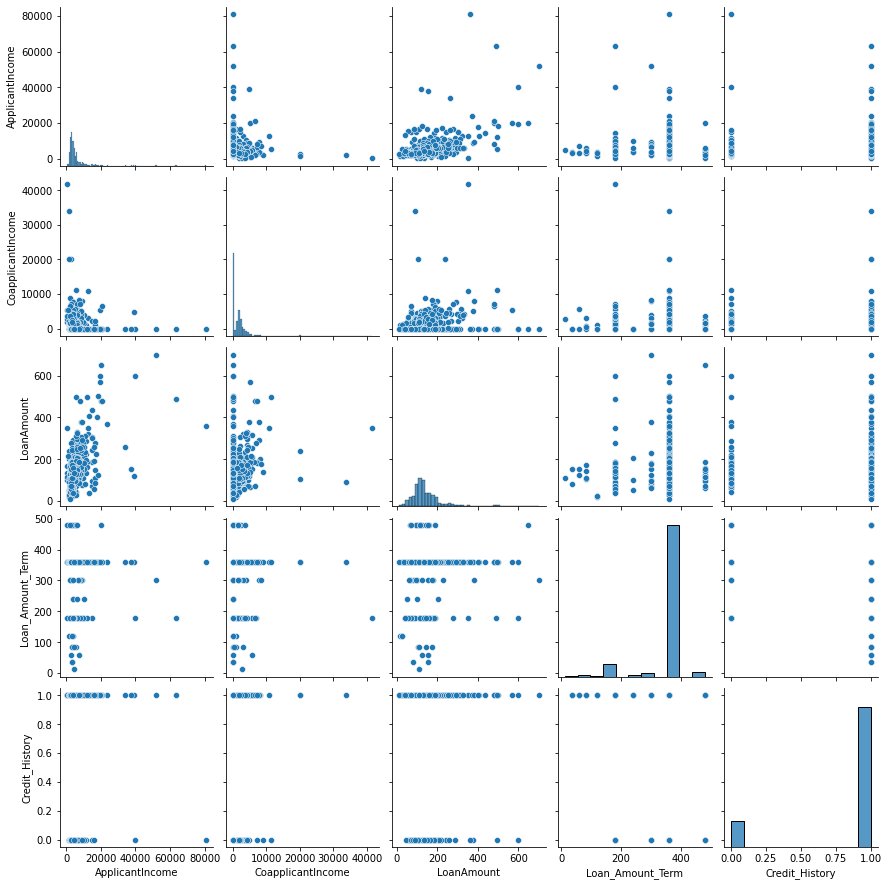

In [ ]:
sns.pairplot(train)

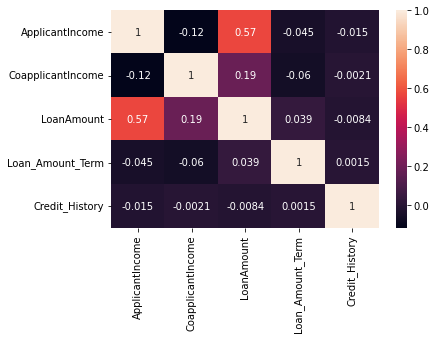

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


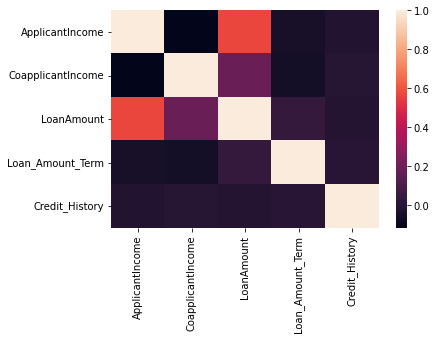

In [17]:
sns.heatmap(train.corr())

Descrete variable and distribution

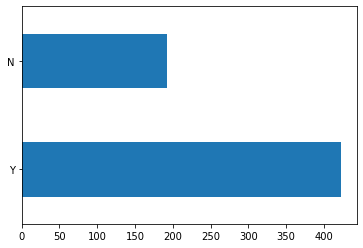

In [20]:
train['Loan_Status'].value_counts().plot(kind='barh')

In [21]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64